In [8]:
import cv2
import json
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import urllib.request
import xml.etree.ElementTree as ET

## Imagem dataset Imagenet

In [9]:
imagenet_urls = 'annotations/fall11_urls.txt'

data = pd.read_csv(imagenet_urls, header = None, delimiter= "	", error_bad_lines=False, nrows=10, names=['filename', 'url'])
data.head()


,filename,url
0,n00004475_6590,http://farm4.static.flickr.com/3175/2737866473...
1,n00004475_15899,http://farm4.static.flickr.com/3276/2875184020...
2,n00004475_32312,http://farm3.static.flickr.com/2531/4094333885...
3,n00004475_35466,http://farm4.static.flickr.com/3289/2809605169...
4,n00004475_39382,http://2.bp.blogspot.com/_SrRTF97Kbfo/SUqT9y-q...


### TESTES COM CAIXAS DELIMITADORAS

In [33]:
def load_image_with_bounding_boxes(image_path, annotation_path):
    
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    bbox = root.findall("object")[0].findall("bndbox")[0]

    xmin = int(bbox[0].text)
    ymin = int(bbox[1].text)
    xmax = int(bbox[2].text)
    ymax = int(bbox[3].text)

    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    return Image.fromarray(img)

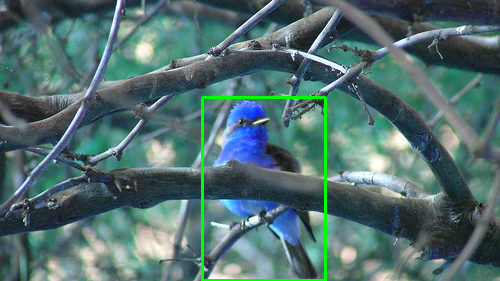

In [34]:
load_image_with_bounding_boxes("images/281890778_1e165563f6.jpg", "annotations/n01503061/n01503061_21376.xml")

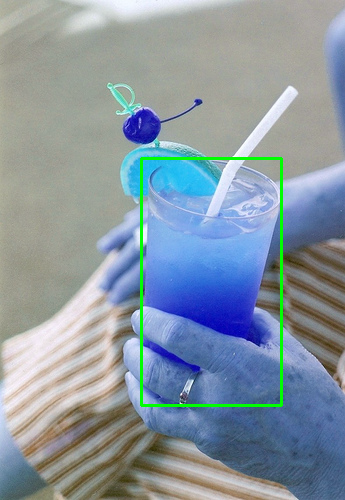

In [36]:
load_image_with_bounding_boxes("images/362520394_8dbef23d2b.jpg", "annotations/n07881800/n07881800_26165.xml")

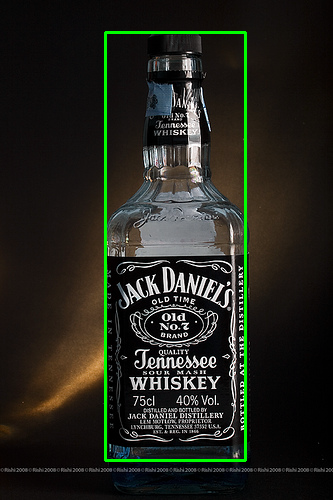

In [39]:
load_image_with_bounding_boxes("images/2784349852_32b44b6523.jpg", "annotations/n07881800/n07881800_25793.xml")